# Introduction

**Objective**

1. Organise in Comprehensible form
2. Visualise
3. Summarize

---

# Statistics

* Population = set of all individuals relevant to a particular statistical question. 
> When we select a smaller group from a population we do sampling. 
* Sample =  smaller group selected from a population
> The individual elements of a population or a sample go under many names. You'll often see the elements of a population referred to as individuals, units, events, observations
* difference between the metrics of a population and the metrics of a sample, can be seen as an error, and because it's the result of sampling, it's called sampling error.
> A metric specific to a population is called a parameter, while one specific to a sample is called a statistic.

<center>${sampling error} = {parameter} - {statistics}$</center>

---
* ## Sampling Error
> In statistical terms, we want our samples to be representative of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wnba.csv')

In [3]:
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [4]:
df.shape

(143, 32)

In [5]:
df.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [6]:
parameter = df['Games Played'].max()
statistics = df['Games Played'].sample(30,random_state=1).max()
"Sampling Statistics: {}".format(parameter-statistics)

'Sampling Statistics: 2'

In [7]:
population_mean = df['PTS'].mean()
sample_mean = []
for i in range(100):
    sample = df['PTS'].sample(10,random_state=i)
    sample_mean.append(sample.mean())


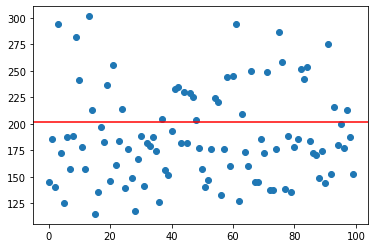

In [8]:
plt.scatter(range(100),sample_mean)
plt.axhline(population_mean,c='red')

In [9]:
print("The samples Min underestimates and Max overestimates ")
print("Min: {0}\nMax: {1}".format(min(sample_mean),max(sample_mean)))

The samples Min underestimates and Max overestimates 
Min: 115.0
Max: 301.4


sample means tend to vary less and less around the population mean as we increase the sample size .
> When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which in turn decreases the chances that we'll get an unrepresentative sample.

* ## Straying sample 

> simple random sampling is entirely random, it can leave out certain population individuals that are of great interest

To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups, and then do simple random sampling for every group. We can group our data set by player position, and then sample randomly from each group. i.e stratifying by player position

> This sampling method is called stratified sampling, and each stratified group is also known as a stratum.

In [10]:
df['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

In [11]:
df['PPG'] = df['PTS'] / df['Games Played']

In [12]:
def pos(i):
    return df[df['Pos']==i]
    

In [13]:
df_dc = {}

for i in df['Pos'].unique():
    name = "df_" + i
    df_dc[name] = df[df['Pos'] == i]

In [14]:
df_dc.keys()

dict_keys(['df_F', 'df_G/F', 'df_G', 'df_C', 'df_F/C'])

In [15]:
df_dc_mean = {}
for k,v in df_dc.items():
    sample = v.sample(10,random_state=0)
    mean_sample = sample['PPG'].mean()
    df_dc_mean[k] = mean_sample

In [16]:
max(df_dc_mean,key=df_dc_mean.get)

'df_C'

In [17]:
# Solution
# wnba = df.copy()
# wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# # Stratifying the data in five strata
# stratum_G = wnba[wnba.Pos == 'G']
# stratum_F = wnba[wnba.Pos == 'F']
# stratum_C = wnba[wnba.Pos == 'C']
# stratum_GF = wnba[wnba.Pos == 'G/F']
# stratum_FC = wnba[wnba.Pos == 'F/C']

# points_per_position = {}
# for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
#                 (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
#     sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sapling on each stratum
#     points_per_position[position] = sample.mean()
    
# position_most_points = max(points_per_position, key = points_per_position.get)
# position_most_points

---

In [18]:
print("Min: {}\nMax: {}".format(df['Games Played'].min(),df['Games Played'].max()))

Min: 2
Max: 32


Approximately 72.7% of the players had more than 23 games for the 2016-2017 season, which means that the mean of the total points is probably influenced by this category of players who played a lot of games

In [19]:
df['Games Played'].value_counts(bins =3 ,normalize=True)*100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

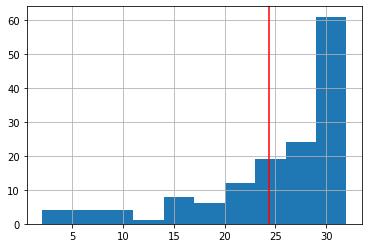

In [20]:
df['Games Played'].hist()
plt.axvline(df['Games Played'].mean(),c='red')

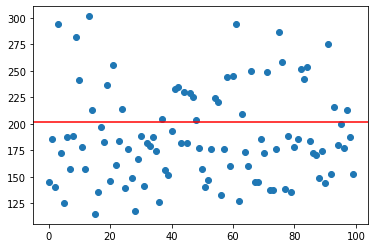

In [21]:
plt.scatter(range(100),sample_mean)
plt.axhline(population_mean,c='red')

---
use stratified sampling while being mindful of the proportions in the population. We can stratify our data set by the number of games played, and then sample randomly from each stratum a proportional number of observations.

In [22]:
df.iloc[:,:15].head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50


In [23]:
df['Games Played'].value_counts(bins=3,normalize=True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

In [24]:
df['Games Played'].value_counts(bins=3)

(22.0, 32.0]     104
(12.0, 22.0]      26
(1.969, 12.0]     13
Name: Games Played, dtype: int64

In [25]:
df['Games Played'].shape

(143,)

**Proportions the data according to the bins**

* 22 games : 7 Random Sampling
* 13 -22 games : 2 Random Sampling
* < 13  games : 1 Random Sampling



In [26]:
strata_less = df[df['Games Played'] <= 12]

In [27]:
strata_mid = df[(df['Games Played'] > 12) & (df['Games Played'] <= 22) ]

In [28]:
strata_high =df[df['Games Played'] > 22]

In [29]:
stratified_mean = []
for i in range(100):
    sample_1 = strata_less.sample(1,random_state=i)
    sample_2 = strata_mid.sample(2,random_state=i)
    sample_3 = strata_high.sample(7,random_state=i)
    sample_df = pd.concat([sample_1,sample_2,sample_3])
    stratified_mean.append(sample_df['PTS'].mean())

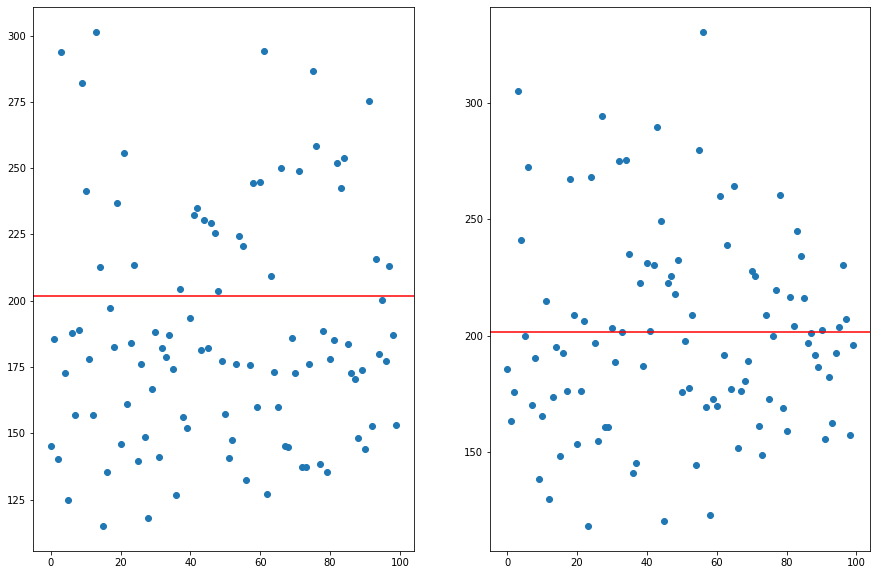

In [30]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.scatter(range(100),sample_mean)
plt.axhline(population_mean,c='red')

plt.subplot(1, 2, 2)
plt.scatter(range(100),stratified_mean)
plt.axhline(df['PTS'].mean(),c='red')

not have been very impressed by what we've just got with sampling proportionally. The variability of the sampling was quite large, and many sample means were unrepresentative, being far from the population mean. In fact, this sampling method doesn't seem to perform better than simple random sampling
The poor performance is caused by a bad choice of strata. We stratified the data by the number of games played, but this isn't a good approach.

> A player is considered as having played one game even if she only played for one or two minutes. But others play 30 or 40 minutes, and they're still considered as having played one game.

It makes more sense to stratify the data by number of minutes played, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

> few guidelines for choosing good strata:
    * Minimize the variability within each stratum. 
    i.e avoid having in the same stratum a player that has scored 10 points and a player that has scored 500. If the variability is high, it might be a sign that you either need a more granular stratification (need more strata), or you need to change the criterion of stratification (an example of criterion is minutes played).
    * Maximize the variability between strata.
    Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or to change the stratification criterion. In the previous screen, stratifying the data by games played resulted in strata that weren't too different from each other with respect to the distribution of the total points. We managed to increase the variability between strata by changing the criterion of stratification to minutes played.
    * The stratification criterion should be strongly correlated with the property you're trying to measure.
    For instance, the column describing minutes played (the criterion) should be strongly correlated with the number of total points (property we want to measure). We've covered briefly the concept of correlation in the pandas courses, and we'll cover it again later in these statistics courses, so don't worry if the concept of correlation doesn't make much sense to you now.
    

---
* ## Cluster Sampling

list all the data sources you can find, and then randomly pick only a few of them to collect data from. Then you can sample individually each of the sources you've randomly picked. This sampling method is called cluster sampling, and each of the individual data sources is called a cluster.

In [31]:
df['Team'].unique()

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

In [32]:
# to pick randomly a few clusters from our listing.
#  avoid picking a cluster twice
pd.Series(df['Team'].unique()).sample(4,random_state=0)

6     PHO
11    IND
4     MIN
10    ATL
dtype: object

Once we pick the clusters, we move to collecting the data. We can collect all the data from each cluster, but we can also perform sampling on each. It's actually possible to use different sampling methods for different clusters.
i.e  use stratified sampling on the first two clusters, and simple random sampling on the other two.

In [33]:
cluster_team = pd.Series(df['Team'].unique()).sample(4,random_state=0)

In [34]:
cluster_dict = {}
for i in cluster_team:
    team = df[df['Team']==i]
    cluster_dict[i] = team

In [39]:
cluster_df = pd.concat([cluster_dict['PHO'],cluster_dict['IND'],cluster_dict['MIN'],cluster_dict['ATL']])

In [41]:
cluster_df

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,PPG
6,Alexis Prince,PHO,G,188,81.0,22.917610,US,"February 5, 1994",23,Baylor,...,14,15,5,4,3,3,24,0,0,1.500000
15,Angel Robinson,PHO,F/C,198,88.0,22.446689,US,"August 30, 1995",21,Arizona State,...,42,58,8,1,11,16,58,0,0,3.866667
25,Brittney Griner,PHO,C,206,93.0,21.915355,US,"October 18, 1990",26,Baylor,...,129,172,39,13,54,52,461,6,0,20.954545
27,Camille Little,PHO,F,188,82.0,23.200543,US,"January 18, 1985",32,North Carolina,...,71,113,42,28,13,50,228,0,0,7.600000
32,Cayla George,PHO,C,193,87.0,23.356332,AU,"April 20, 1987",30,Georgia,...,71,81,15,9,11,13,100,1,0,3.571429
42,Danielle Robinson,PHO,G,175,57.0,18.612245,US,"October 5, 1989",27,Oklahoma,...,73,86,106,33,4,58,209,0,0,7.464286
45,Diana Taurasi,PHO,G,183,74.0,22.096808,US,"November 6, 1982",34,Connecticut,...,98,129,32,20,31,28,376,3,0,18.800000
48,Emma Cannon,PHO,F,188,86.0,24.332277,US,"January 6, 1989",28,Central Florida,...,72,105,52,21,27,30,252,1,0,14.000000
86,Leilani Mitchell,PHO,G,165,58.0,21.303949,US,"June 15, 1985",32,Utah,...,57,69,108,26,9,50,233,0,0,7.766667
95,Monique Currie,PHO,G/F,183,80.0,23.888441,US,"February 25, 1983",34,Duke,...,103,122,67,22,11,48,364,0,0,11.375000


In [44]:
def sampling_error(dfpop,dfsamp,col):
    result = dfpop[col].mean() - dfsamp[col].mean()
    return result

In [46]:
sampling_error_height = sampling_error(df,cluster_df,'Height')

In [47]:
sampling_error_age = sampling_error(df,cluster_df,'Age')

In [48]:
sampling_error_BMI = sampling_error(df,cluster_df,'BMI')

In [49]:
sampling_error_points = sampling_error(df,cluster_df,'PTS')

In [ ]:
# team = pd.Series(wnba['Team'].unique()).sample(4,random_state=0)
# cluster_df = pd.DataFrame()
# for i in team:
#     team_df = wnba[wnba['Team']==i]
#     cluster_df = cluster_df.append(team_df)

---
Let's say you work for an e-commerce company that has a table in a database with more than 10 million rows of online transactions. The marketing team asks you to analyze the data and find categories of customers with a low buying rate, so that they can target their marketing campaigns at the right people. 

Instead of working with more than 10 million rows at each step of your analysis, you can save a lot of code running time by sampling several hundred rows, and perform your analysis on the sample. You can do a simple random sampling, but if you're interested in some categories beforehand, it might be a good idea to use stratified sampling.

Let's consider a different situation. It could be that you need to collect data from an API that either has a usage limit, or is not free. In this case, you are more or less forced to sample. Knowing how and what to sample can be of great use.

Practical statistical analysis revolves entirely around the distinction between a population and a sample. When we're doing statistics in practice, our goal is either to describe a sample or a population, or to use a sample to draw conclusions about the population to which it belongs (or a mix of these two goals).

When we describe a sample or a population (by measuring averages, proportions, and other metrics; by visualizing properties of the data through graphs; etc.), we do **descriptive statistics.**

When we try to use a sample to draw conclusions about a population, we do **inferential statistics** (we infer information from the sample about the population).

In [50]:
pwd

'C:\\Users\\Dan\\Code\\Python\\py_statistics'